#  Zernike polynomials for square aperture

In [3]:
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm.notebook import tqdm, trange

from scipy.optimize import curve_fit
from scipy.optimize import minimize

from zernike.utils import *
from zernike.ZernikePolynomials import SquarePolynomials
from zernike.utils import *
plt.set_cmap("RdBu")

ModuleNotFoundError: No module named 'ZernikePolynomials'

Building design matrix...
Done


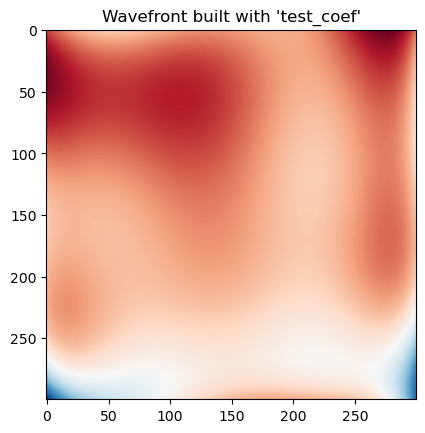

In [2]:
shape = (300, 300)

# Constructing the wavefront using Zernike 

square_poly = SquarePolynomials() 

# Create coordinate grids
side_x = np.linspace(-1/np.sqrt(2), 1/np.sqrt(2), shape[1])
side_y = np.linspace(-1/np.sqrt(2), 1/np.sqrt(2), shape[0])

X, Y = np.meshgrid(side_x, side_y)
xdata = [X, Y]

test_coef = [1.0, 2.5, 5.8, 2.2, -1.3, -2.5, 2, -1.5, 1.6, -0.8, 1.2, -1.4, 2.5, 0.3, 0.2,1.0, 2.5, 5.8, 2.2, -1.3, -2.5, 2, -1.5, 1.6, -0.8, 1.2, -1.4, 2.5, 0.3]
# construction the wavefront

all_results = square_poly.evaluate_all(xdata, test_coef)
wavefront = sum(all_results.values())

# coeffs = extract_rectangular_coefficients(wavefront, a=param_a)
# coeffs2 = extract_rectangular_coefficients_v2(wavefront, a=param_a)
coeffs = extract_square_coefficients_vectorized(wavefront)

fig, ax = plt.subplots()
ax.imshow(wavefront)
ax.set_title("Wavefront built with 'test_coef'")
plt.show()

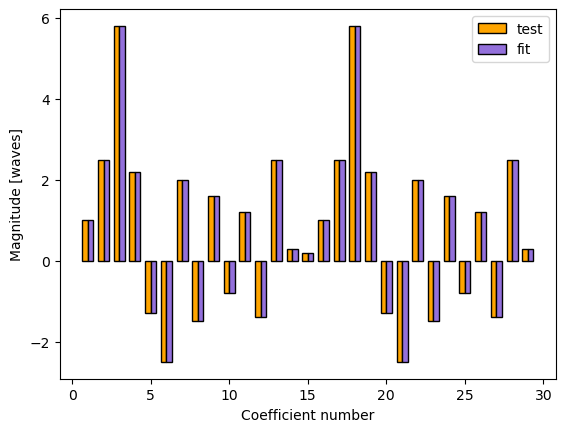

In [3]:
fig, ax = plt.subplots()
x = np.arange(1,len(test_coef)+1, 1) 
ax.bar(x[:]-0.175, test_coef[:], color='orange', width = 0.35, edgecolor='black', label = "test")
ax.bar(x[:]+0.175, coeffs[:], color='mediumpurple', width = 0.35, edgecolor='black', label = "fit")
ax.set_xlabel("Coefficient number")
ax.set_ylabel("Magnitude [waves]")
ax.legend()
plt.show()
